<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-and-setting-up-GWAS-and-LMI-outputs" data-toc-modified-id="Read-and-setting-up-GWAS-and-LMI-outputs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read and setting up GWAS and LMI outputs</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Filters-for-the-LMI-values" data-toc-modified-id="Filters-for-the-LMI-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Filters for the LMI values</a></span><ul class="toc-item"><li><span><a href="#Filter-one:-Removing-the-LMI-negative-values" data-toc-modified-id="Filter-one:-Removing-the-LMI-negative-values-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Filter one: Removing the LMI negative values</a></span></li><li><span><a href="#Filter-two:-Removing-if-the-SNPs-come-from-the-negative-part-of-their-Z-score-distribution" data-toc-modified-id="Filter-two:-Removing-if-the-SNPs-come-from-the-negative-part-of-their-Z-score-distribution-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Filter two: Removing if the SNPs come from the negative part of their Z-score distribution</a></span></li></ul></li><li><span><a href="#Selecting-the-top-0.5%-SNPs" data-toc-modified-id="Selecting-the-top-0.5%-SNPs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Selecting the top 0.5% SNPs</a></span></li><li><span><a href="#Manhattan-plot-of-LMI-values" data-toc-modified-id="Manhattan-plot-of-LMI-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Manhattan plot of LMI values</a></span></li><li><span><a href="#Adding-the-143-GWASpv-<1e-04-prioritized-in-the-paper" data-toc-modified-id="Adding-the-143-GWASpv-<1e-04-prioritized-in-the-paper-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Adding the 143 GWASpv &lt;1e-04 prioritized in the paper</a></span></li><li><span><a href="#Plot:-Correlation-GWASpv-LMI" data-toc-modified-id="Plot:-Correlation-GWASpv-LMI-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot: Correlation GWASpv LMI</a></span></li><li><span><a href="#Plot:-Zoom-distribution-of-LMI-scores." data-toc-modified-id="Plot:-Zoom-distribution-of-LMI-scores.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Plot: Zoom distribution of LMI scores.</a></span></li><li><span><a href="#Getting-the-624-selected-GWAS+LMI-SNPs" data-toc-modified-id="Getting-the-624-selected-GWAS+LMI-SNPs-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Getting the 624 selected GWAS+LMI SNPs</a></span></li></ul></li></ul></div>

### Read and setting up GWAS and LMI outputs

For this part, we will be using R.

In [4]:
# Install these two R, if not already installed 
library(dplyr)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
# Set up a directory pointing to where the data are being stored (generally, should be the GitHub repo folder) 
wd=YOUR_PATH/data
#wd="~/Projects/pancreas_HiC/Scripts_clean_paper/data"

In [6]:
# read the sumstats you just generated
sumstats=read.table(paste0(wd,"/sumstats.raw.pangen_isblac_epicuro"), header=F)
colnames(sumstats)=c("snp","chr","position","or","pv")

In [8]:
# read the LMI outputs
lmi=read.csv(paste0(wd,"/results_LMI/sumstats.raw.pangen_isblac_epicuro_localMoranI.all"), header=F, na.strings=c("","NA"), sep='\t')
colnames(lmi)=c("snp", "position","score")

In [10]:
# check both:
head(lmi)
dim(lmi)
head(sumstats)
dim(sumstats)

,snp,position,score
,<fct>,<int>,<dbl>
1,chr1_834753_C_G,834753,-0.7103531
2,rs72890788,836924,-0.5520486
3,rs4475691,846808,1.2107900
4,chr1_847228_C_T,847228,1.6149810
5,chr1_854250_A_G,854250,1.4949020
6,rs2880024,866893,0.2308610


[1] 313593      3

,snp,chr,position,or,pv
,<fct>,<int>,<int>,<dbl>,<dbl>
1,rs7214193,17,70641865,1.3431866,0.0001002464
2,rs10098985,8,128355019,0.7707201,0.0001014601
3,rs2392780,8,128388025,0.7725445,0.0001016394
4,chr1_145561008_G_T,1,145561008,1.4925075,0.0001036869
5,chr3_177439879_C_T,3,177439879,0.7575032,0.0001039202
6,rs4479968,6,104224562,1.4691906,0.0001060757


[1] 317270      5

In [26]:
# how many are not NAs?
dim(lmi[!is.na(lmi$score),])
lmi=lmi[!is.na(lmi$score),]
# proportion of snps with LMI over total
313573/317270

[1] 313573      3

[1] 0.9883475

In [27]:
# Merge LMI & pv.
sumstats_lmi=merge(sumstats,lmi, by='snp')
dim(sumstats_lmi)
head(sumstats_lmi,5)

[1] 313573      7

snp,chr,position.x,or,pv,position.y,score
<fct>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
104,4,163274318,1.1501203,0.05514656,163274318,1.81551600
1057,4,163404431,1.0085650,0.91934335,163404431,-0.70176750
1068,4,163406237,1.1070019,0.47902035,163406237,0.45234200
107,4,163274446,1.1743654,0.04155792,163274446,2.35241200
1165,4,163417343,0.9484221,0.57621857,163417343,0.00355534


In [15]:
summary(sumstats_lmi)

      snp              chr           position.x              or        
 104    :     1   Min.   : 1.000   Min.   :    13905   Min.   :0.5807  
 1057   :     1   1st Qu.: 4.000   1st Qu.: 30051433   1st Qu.:0.9486  
 1068   :     1   Median : 8.000   Median : 65538062   Median :1.0015  
 107    :     1   Mean   : 8.991   Mean   : 77017307   Mean   :1.0061  
 1165   :     1   3rd Qu.:13.000   3rd Qu.:114303189   3rd Qu.:1.0581  
 1178   :     1   Max.   :22.000   Max.   :249170711   Max.   :1.8463  
 (Other):313567                                                        
       pv              position.y            score         
 Min.   :0.0000009   Min.   :    13905   Min.   :-5.39595  
 1st Qu.:0.2354156   1st Qu.: 30051433   1st Qu.:-0.02847  
 Median :0.4844420   Median : 65538062   Median : 0.09774  
 Mean   :0.4894908   Mean   : 77017307   Mean   : 0.30061  
 3rd Qu.:0.7432484   3rd Qu.:114303189   3rd Qu.: 0.45958  
 Max.   :0.9999990   Max.   :249170711   Max.   :18.23877  
    

In [16]:
# Saving sumstats merged with LMI for each SNPs
save(sumstats_lmi,file="sumstats_lmi.Rda")

### Analysis

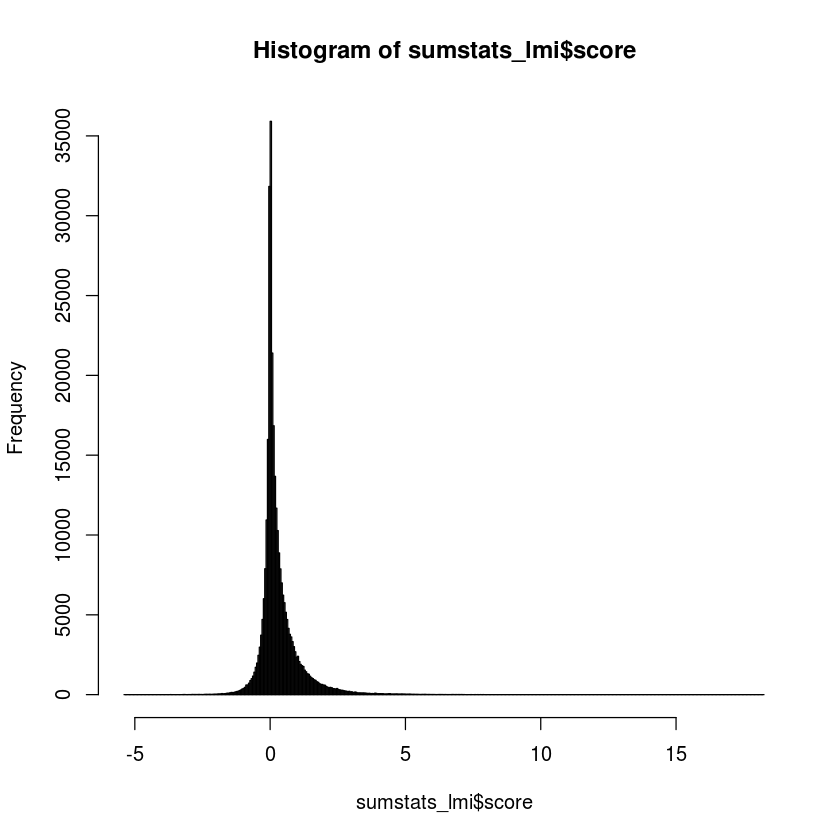

In [17]:
# histogram of LMI values
hist(sumstats_lmi$score, breaks=500)

#### Filters for the LMI values

As explained in the paper we will remove those with negative LMI and as well those that come from the negative part of the cdf.

##### Filter one: Removing the LMI negative values

In [32]:
sumstats_lmi.fil1=sumstats_lmi[sumstats_lmi$score > 0,]
dim(sumstats_lmi.fil1)

[1] 213220      7

##### Filter two: Removing if the SNPs come from the negative part of their Z-score distribution

In [19]:
# read a full file with the cdf for each chromosome separately.
# we will now find the SNPs that had a LMI > 0 and find them in here.
# removing them in case they come from the negative part
delz=read.table(paste0(wd,"/sumstats/sumstats.raw.pangen_isblac_epicuro.cdf.all"))
colnames(delz)=c("chr", "position","snp","or","pv","or1","zscore")

In [20]:
dim(delz) # there are 1,328 SNPs that had NA in the summary statistics for the OR.
315942+1328 # Note that it adds up to the total initial number.

[1] 315942      7

[1] 317270

In [21]:
# To delete, select those snps with a Z<0
todel=delz[delz$zscore < 0,]

# how many SNPs we remove with this filter step
dim(todel)

[1] 157965      7

In [43]:
# Apply the filter
sumstats_lmi.fil2=sumstats_lmi.fil1[!sumstats_lmi.fil1$position.x %in% todel$position,]
# Set it to a clean new variable
sumstats_lmi.clean=sumstats_lmi.fil2[complete.cases(sumstats_lmi.fil2),]

In [46]:
# The final set of 102,146
dim(sumstats_lmi.clean)

[1] 102146      7

In [2]:
summary(sumstats_lmi.clean)

      snp              chr           position.x              or        
 104    :     1   Min.   : 1.000   Min.   :    13905   Min.   :0.5807  
 1068   :     1   1st Qu.: 4.000   1st Qu.: 31003712   1st Qu.:0.9034  
 107    :     1   Median : 8.000   Median : 66450460   Median :1.0597  
 1165   :     1   Mean   : 8.978   Mean   : 77333146   Mean   :1.0141  
 120    :     1   3rd Qu.:13.000   3rd Qu.:114420088   3rd Qu.:1.1123  
 1202   :     1   Max.   :22.000   Max.   :249154567   Max.   :1.8463  
 (Other):102140                                                        
       pv              position.y            score          
 Min.   :0.0000009   Min.   :    13905   Min.   : 0.000001  
 1st Qu.:0.0919464   1st Qu.: 31003712   1st Qu.: 0.093431  
 Median :0.2063276   Median : 66450460   Median : 0.310751  
 Mean   :0.2269801   Mean   : 77333146   Mean   : 0.643291  
 3rd Qu.:0.3413370   3rd Qu.:114420088   3rd Qu.: 0.822685  
 Max.   :0.7175019   Max.   :249154567   Max.   :18.238770

In [47]:
save(sumstats_lmi.clean, file="sumstats_lmi.clean.rdata")

In [1]:
#load("/home/jrodriguez/Projects/pancreas_HiC/Scripts/sumstats_lmi.clean.rdata")

#### Selecting the top 0.5% SNPs

In [75]:
# Select top 0.5% of the positive values
# Check the threshold: 0.5%=1/200 SNPs will be selected and show the percentiles
tail(quantile(sumstats_lmi.clean$score,
                       prob = seq(0, 1, length = 201),
                       type = 1))

97.5%     98.0%     98.5%     99.0%     99.5%    100.0% 
 3.181269  3.472233  3.873760  4.370065  5.107103 18.238770

In [67]:
threshold_lmi=5.107103

In [74]:
# How many SNPs will we keep
length(which(sumstats_lmi.clean$score > threshold_lmi))

[1] 510

#### Manhattan plot of LMI values

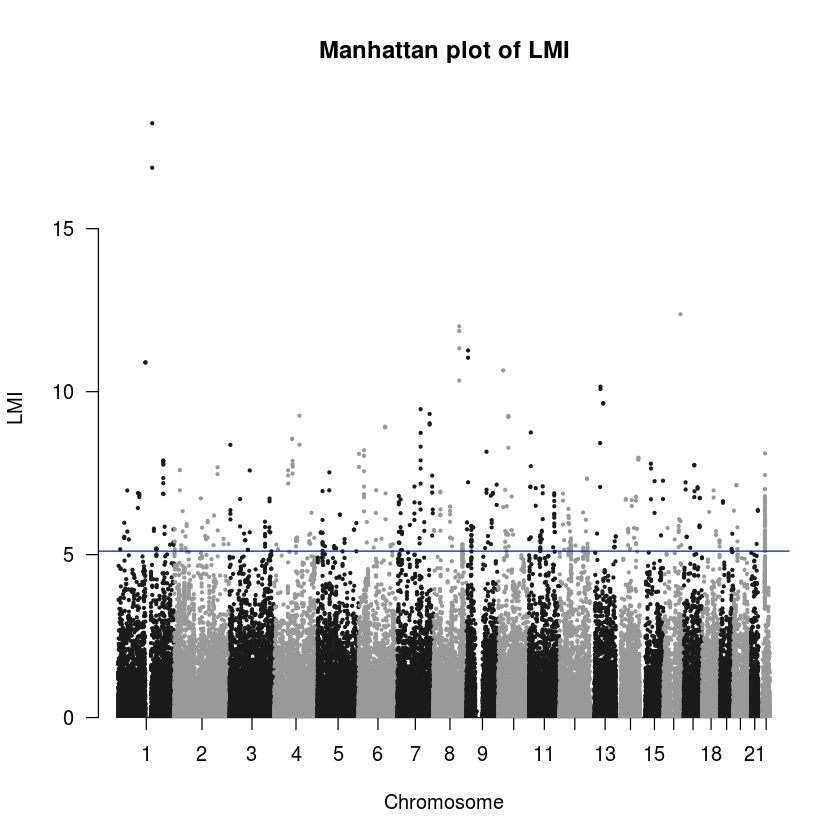

In [73]:
library(qqman)

# COPY THE DATAFRAME TO DO THE MANHATTAN
manh_LMI=sumstats_lmi.clean
colnames(manh_LMI)=c("SNP","CHR","BP","OR","P","pos_y","score")

manhattan(manh_LMI,p="score",logp = FALSE, ylab = "LMI", genomewideline = FALSE, 
    suggestiveline = 5.107103, main = "Manhattan plot of LMI",cex=0.5)

In [57]:
# perform the selection of these 510 top SNPs
lmi_selection=subset(sumstats_lmi.clean[sumstats_lmi.clean$score > threshold_lmi,], select=c(1,2,3,4,5,7))
head(lmi_selection)

,snp,chr,position.x,or,pv,score
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
34,2543,4,163606031,0.7172544,0.011333183,6.282651
239,c1_pos120983010,1,121281487,1.5340550,0.001826026,10.897990
354,c3_pos157892782,3,156410088,0.6922817,0.010629577,6.012305
363,c3_pos158180281,3,156697587,0.7287885,0.033223549,5.848027
520,c9_pos21944071,9,21954071,0.7523026,0.035140835,5.398795
1944,chr10_21182034_A_C,10,21182034,1.3130735,0.052441876,10.654810


#### Adding the 143 GWASpv <1e-04 prioritized in the paper
As we comment on the paper, we analyzed altogether the LMI SNPs and the GWAS pv SNPs.

In [52]:
# run a quick command on bash to select only those 143 SNPs, instead of reading again the dataset here
# bash select those 143 that overpass the pvalue threshold on any cohort.
# the 13th column denotes the more significant pvalue in any cohort.
try(system(paste0("awk '$13 < 0.0001' ",wd,"/sumstats.raw | cut -f1-4,13 > ",wd,"/sumstats.raw.pv1e4"), intern = TRUE))
# read the 143 SNPs
pv143=read.table(paste0(wd,"/sumstats.raw.pv1e4"), header=F)
colnames(pv143)=c("snp","chr","position.x","or","pv")
dim(pv143)
head(pv143)

character(0)

In [58]:
# How many of the 143 are already selected by LMI
dim(lmi_selection[lmi_selection$snp %in% pv143$snp,])

[1] 29  6

In [61]:
# Add for those 143 their LMI, finding them in the full dataset
pv143_score=subset(merge(sumstats_lmi,pv143, by="snp"),select=c(1,2,3,4,11,7))
colnames(pv143_score)=c("snp","chr","position.x","or","pv","score")
dim(pv143_score)

[1] 142   6

In [63]:
# Remove these 143 SNPs from the dataset.
# This way, we will add the SNPs with the pvalue minor that Evangelina et al used to select them.
# Otherwise, we will get only the pvalue from the cohort from which we got the ORs.
quitar=subset(sumstats_lmi.clean[!sumstats_lmi.clean$snp %in% pv143_score$snp,],select = c(1,2,3,4,5,7))

In [66]:
dim(sumstats_lmi.clean)

[1] 102146      7

In [65]:
dim(quitar)

[1] 102022      6

In [67]:
# There is one SNP missing the LMI value. Get it and still add it to the dataframe, with a NA as LMI.
miss=pv143[!pv143$snp %in% sumstats_lmi$snp,]
miss$score=NA

In [70]:
toplot=distinct(rbind(quitar, pv143_score, miss))

In [84]:
summary(toplot)

      snp              chr           position.x              or        
 104    :     1   Min.   : 1.000   Min.   :    13905   Min.   :0.5807  
 1068   :     1   1st Qu.: 4.000   1st Qu.: 31004188   1st Qu.:0.9034  
 107    :     1   Median : 8.000   Median : 66452562   Median :1.0597  
 1165   :     1   Mean   : 8.978   Mean   : 77335913   Mean   :1.0141  
 120    :     1   3rd Qu.:13.000   3rd Qu.:114421313   3rd Qu.:1.1123  
 1202   :     1   Max.   :22.000   Max.   :249154567   Max.   :1.8463  
 (Other):102159                                                        
       pv                score         
 Min.   :0.0000009   Min.   :-2.39716  
 1st Qu.:0.0918779   1st Qu.: 0.09338  
 Median :0.2062747   Median : 0.31066  
 Mean   :0.2269343   Mean   : 0.64301  
 3rd Qu.:0.3412743   3rd Qu.: 0.82253  
 Max.   :0.7175019   Max.   :18.23877  
                     NA's   :1         

In [71]:
dim(sumstats_lmi.clean)
# t1 has 1 snp more because we added the "miss" snp that had no LMI value.
dim(toplot)

[1] 102146      7

[1] 102165      6

In [86]:
threshold_lmi

[1] 5.1071

#### Plot: Correlation GWASpv LMI

Warning message in cor.test.default(toplot$score, -log10(toplot$pv), method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  toplot$score and -log10(toplot$pv)
S = 6.7373e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6209081 


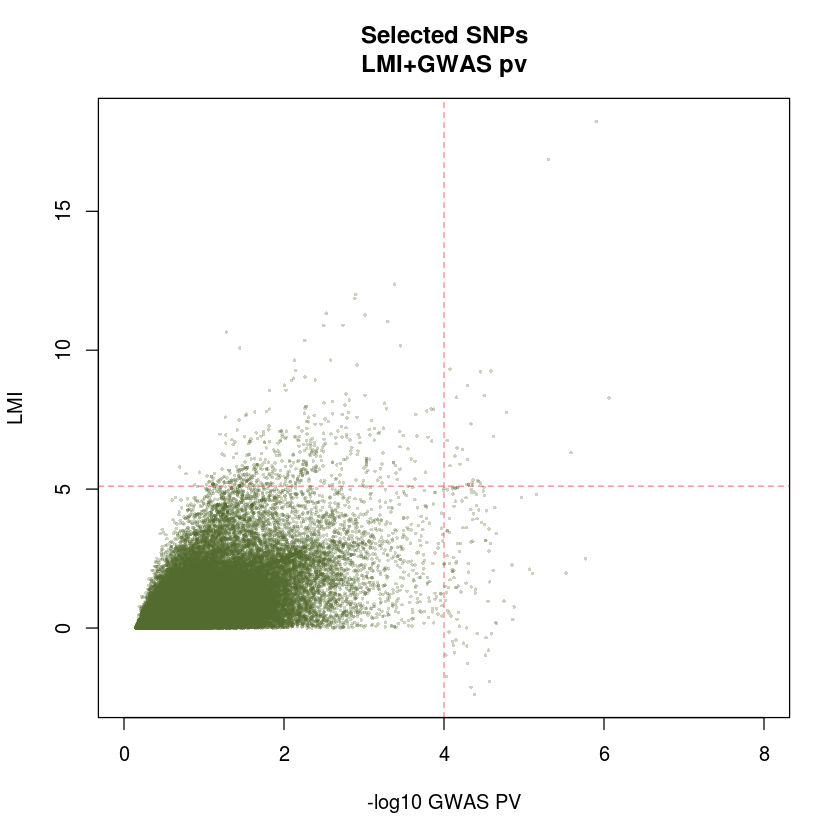

In [77]:
# Plot the LMI & GWAS pvalue data.
#pdf()
threshold_lmi=5.1071
plot(-log10(toplot$pv),toplot$score,
     main = "Selected SNPs\nLMI+GWAS pv",
     xlab="-log10 GWAS PV",
     ylab="LMI",
#     ylim=c(0,),
     xlim=c(0,8),
     type="n"
    )
abline(h=threshold_lmi,col=alpha('red',0.5),lty="dashed")
abline(v=-log10(1e-4),col=alpha('red',0.5),lty="dashed")

points(-log10(toplot$pv),toplot$score,pch=16,
     cex=0.4,
     col=alpha('darkolivegreen',0.3))

cor.test(toplot$score,
         -log10(toplot$pv), 
         method='spearman')
#dev.off()

#### Plot: Zoom distribution of LMI scores.

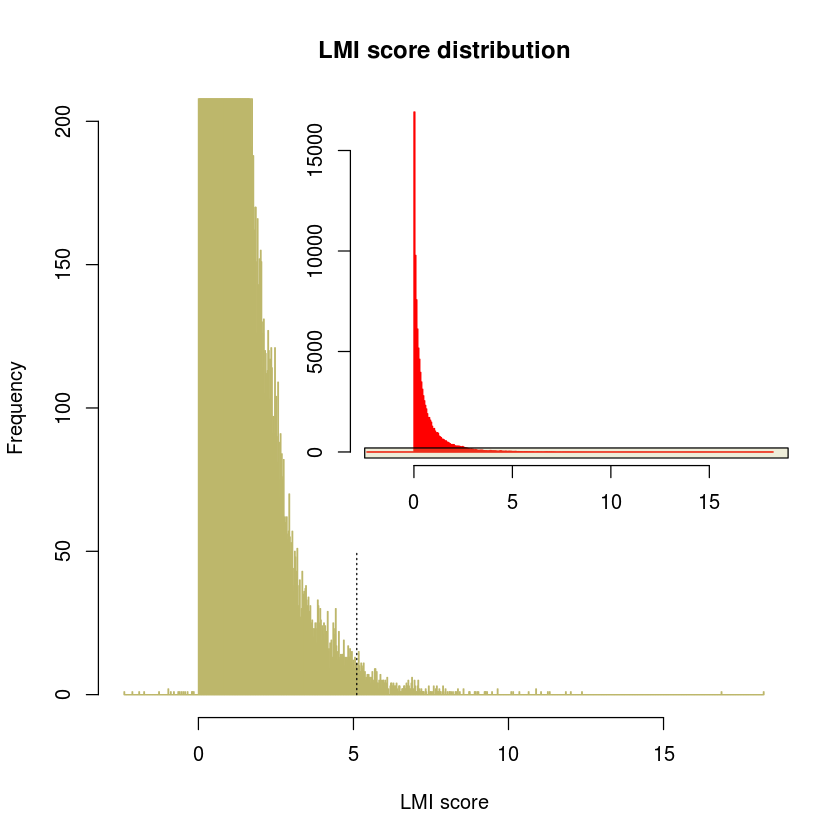

In [75]:
#pdf()
par(new = FALSE)
hist(toplot$score,
     main="LMI score distribution",
     xlab='LMI score',
     breaks=1000,
    ylim=c(0,200),
    border="darkkhaki")
segments(x0=5.1071,y0=0,x1=5.1071,y1=50,col="black", lty='dotted')
par(new = TRUE)
par(fig = c(0.3, 1, 0.3, 1))
# Full distribution as subplot
hist(toplot$score,
     breaks=300,
    xlab=NULL,
     ylab=NULL,
     col='red',
     border="red",
     main=NULL
    )
polygon(c(-2.5,-2.5,19,19),c(200,-300,-300,200),col=alpha('darkkhaki',0.25),border=TRUE,density=NULL)
#dev.off()

#### Getting the 624 selected GWAS+LMI SNPs

In [81]:
dim(toplot)

[1] 102165      6

In [91]:
# Combine both dataframes, those selected with LMI and pv, and select unique entries because there are 29 in common.
tosave_lmipv=toplot[which(toplot$score > threshold_lmi | toplot$pv < 0.0001),]

# Just sort them
tosave_lmipv=tosave_lmipv[order(tosave_lmipv$chr,tosave_lmipv$position.x),]

# We get 624 SNPs
dim(tosave_lmipv)

tail(tosave_lmipv[order(tosave_lmipv$pv),])

[1] 624   6

,snp,chr,position.x,or,pv,score
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
6463,chr16_49662912_G_T,16,49662912,0.7876675,0.09139230,5.468089
60674,rs2677789,4,16018282,0.7880744,0.09282715,5.158939
846,chr10_44308718_A_G,10,44308718,1.2395789,0.11396467,5.610519
56958,rs2244740,12,20177450,1.2238102,0.13104162,5.151206
4410,chr13_113939146_A_G,13,113939146,0.8201495,0.16771337,5.556497
2315,chr1_158624528_G_T,1,158624528,1.2028351,0.20089090,5.796711


In [92]:
# Save the data frame to file to run in the following scripts.
write.table(tosave_lmipv,
            file=(paste0(wd,'/LMI_pv.snps')),
            quote=FALSE, 
            sep='\t',
            col.names = FALSE,
            row.names = FALSE)

This final table, should contain the SNPs selected through LMI and GWAS pvalue.
For the present analysis we obtained **624 SNPs**

**END**